In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y=make_moons(100,noise=0.25,random_state=2)

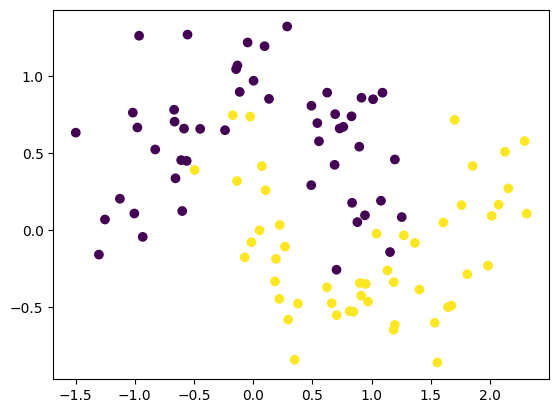

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [7]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 7s 697us/step


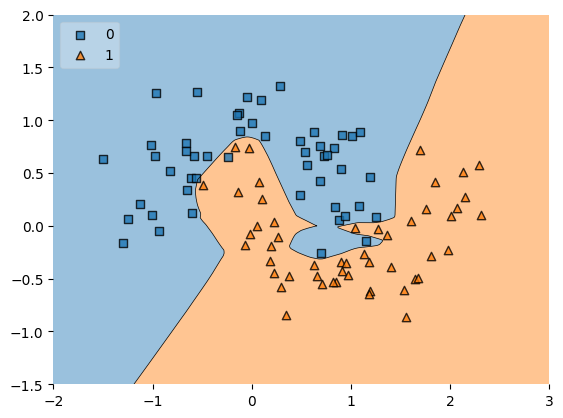

In [9]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

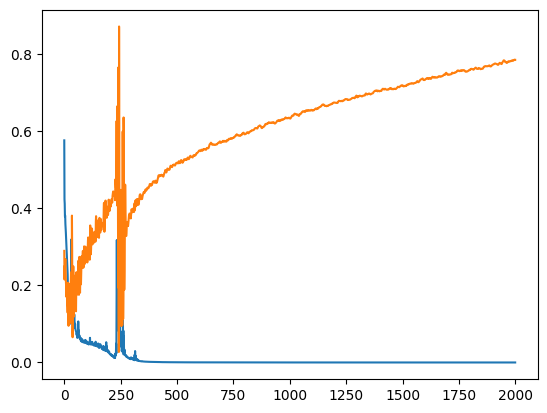

In [10]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [11]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 7s 691us/step


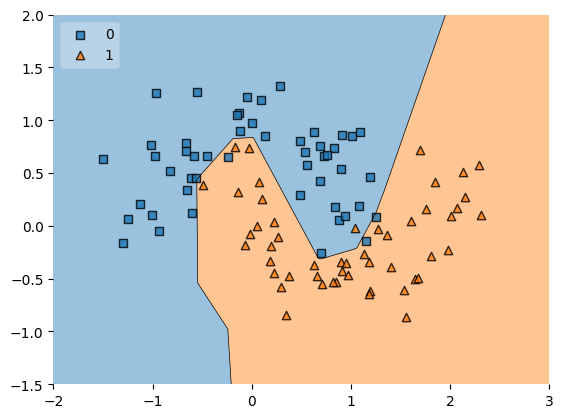

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

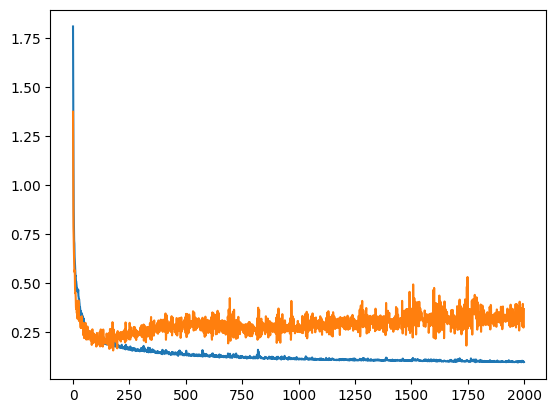

In [15]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [16]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

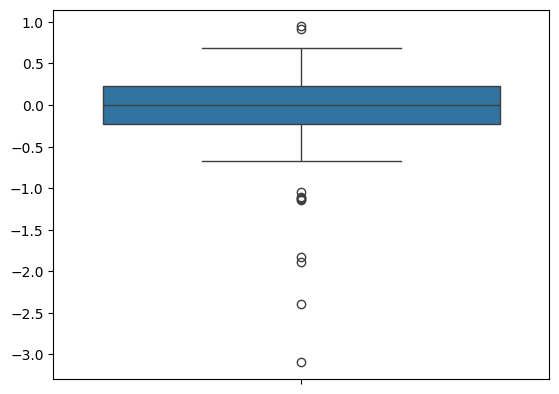

In [17]:
sns.boxplot(model1_weight_layer1)

<Axes: >

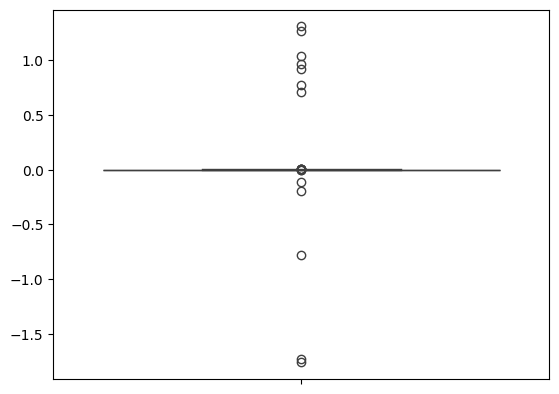

In [18]:
sns.boxplot(model2_weight_layer1)

In [19]:
model1_weight_layer1.min()

-3.0966396

In [20]:
model2_weight_layer1.min()

-1.7614409

C:\Users\uttu2\AppData\Local\Temp\ipykernel_10688\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\uttu2\AppData\Local\Temp\ipykernel_10688\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

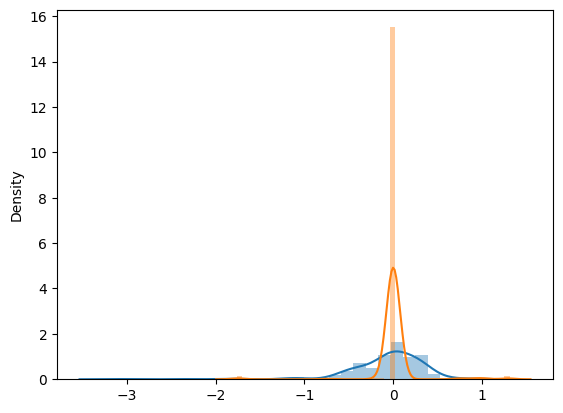

In [21]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [23]:
model1.get_weights()[0].reshape(256)

array([-3.70008826e-01,  2.32025325e-01,  2.49751080e-02, -4.80079241e-02,
       -3.19077015e-01, -5.26379645e-01,  3.04417878e-01, -3.80225003e-01,
       -4.87864316e-01,  2.80002713e-01, -2.80360281e-01, -4.46596742e-01,
        2.76203126e-01, -4.29944456e-01, -3.20811510e-01,  2.57204920e-01,
        1.19471282e-01, -1.18548036e-01, -4.59585696e-01,  9.79127362e-02,
       -4.33930576e-01,  5.76087609e-02, -4.27620113e-02, -1.34112373e-01,
        2.38465339e-01, -5.30497372e-01, -1.57069657e-02,  3.95473361e-01,
       -1.77432999e-01,  1.05901279e-01,  3.02132219e-01, -2.02930365e-02,
       -5.85095942e-01, -4.38036144e-01, -2.83777341e-02,  6.82382807e-02,
        2.50888020e-01, -1.50695080e-02,  1.11814126e-01, -4.14215088e-01,
       -1.99051686e-02,  2.80046761e-02,  1.06308283e-03, -3.01445113e-03,
       -4.10573393e-01,  2.57533997e-01,  2.80051261e-01, -2.66908556e-01,
        1.63575426e-01, -4.10432547e-01,  3.51818234e-01,  3.04631412e-01,
       -5.88766515e-01, -